In [1]:
from zipfile import ZipFile

import numpy as np

with ZipFile("income-classification.zip") as f:
    f.extractall("income-classification")

In [1]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
data_path=r"income-classification/income_evaluation.csv"

columns="age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income"
columns=[col.strip(" ") for col in columns.split(",")]
df = pl.read_csv(data_path,separator=",",new_columns=columns)

In [118]:
df.schema

Schema([('age', Int64),
        ('workclass', String),
        ('fnlwgt', Int64),
        ('education', String),
        ('education-num', Int64),
        ('marital-status', String),
        ('occupation', String),
        ('relationship', String),
        ('race', String),
        ('sex', String),
        ('capital-gain', Int64),
        ('capital-loss', Int64),
        ('hours-per-week', Int64),
        ('native-country', String),
        ('income', String)])

# EDA

In [35]:
print(f"There exists {data.shape[0]} observations \n")
print(f"Number of observations in dataset: {df.shape[0]}\n")
print(f"Number of features in dataset: {df.shape[1] -1 }\n")


There exists 32561 observations 

Number of observations in dataset: 32561

Number of features in dataset: 14



In [95]:
df.describe()

statistic,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
str,f64,str,f64,str,f64,str,str,str,str,str,f64,f64,f64,str,str
"""count""",32561.0,"""32561""",32561.0,"""32561""",32561.0,"""32561""","""32561""","""32561""","""32561""","""32561""",32561.0,32561.0,32561.0,"""32561""","""32561"""
"""null_count""",0.0,"""0""",0.0,"""0""",0.0,"""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,"""0""","""0"""
"""mean""",38.581647,null,189778.366512,null,10.080679,null,null,null,null,null,1077.648844,87.30383,40.437456,null,null
"""std""",13.640433,null,105549.977697,null,2.57272,null,null,null,null,null,7385.292085,402.960219,12.347429,null,null
"""min""",17.0,""" ?""",12285.0,""" 10th""",1.0,""" Divorced""",""" ?""",""" Husband""",""" Amer-Indian-Eskimo""",""" Female""",0.0,0.0,1.0,""" ?""",""" <=50K"""
"""25%""",28.0,null,117827.0,null,9.0,null,null,null,null,null,0.0,0.0,40.0,null,null
"""50%""",37.0,null,178356.0,null,10.0,null,null,null,null,null,0.0,0.0,40.0,null,null
"""75%""",48.0,null,237051.0,null,12.0,null,null,null,null,null,0.0,0.0,45.0,null,null
"""max""",90.0,""" Without-pay""",1.484705e6,""" Some-college""",16.0,""" Widowed""",""" Transport-moving""",""" Wife""",""" White""",""" Male""",99999.0,4356.0,99.0,""" Yugoslavia""",""" >50K"""


In [301]:
# Distribution of Numeric values
numeric_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype==pl.Int64]
categorical_cols = [col for col in df.columns if col not in numeric_cols]

        

In [302]:
categorical_cols

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [303]:
numeric_cols

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

Text(0.5, 1.0, 'Income class distribution')

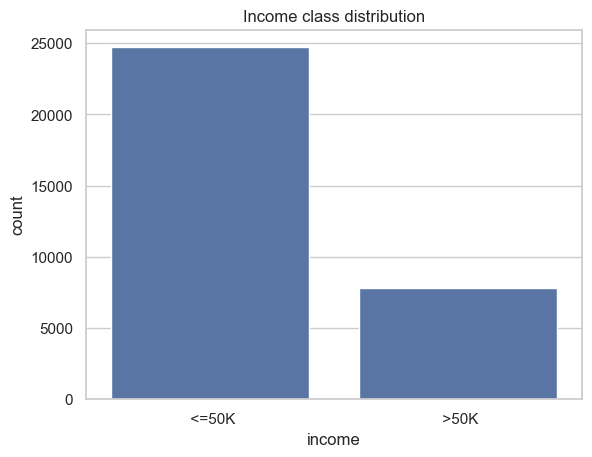

In [3]:
# Target Variable Distrubution
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="income", data=df)
plt.title("Income class distribution")

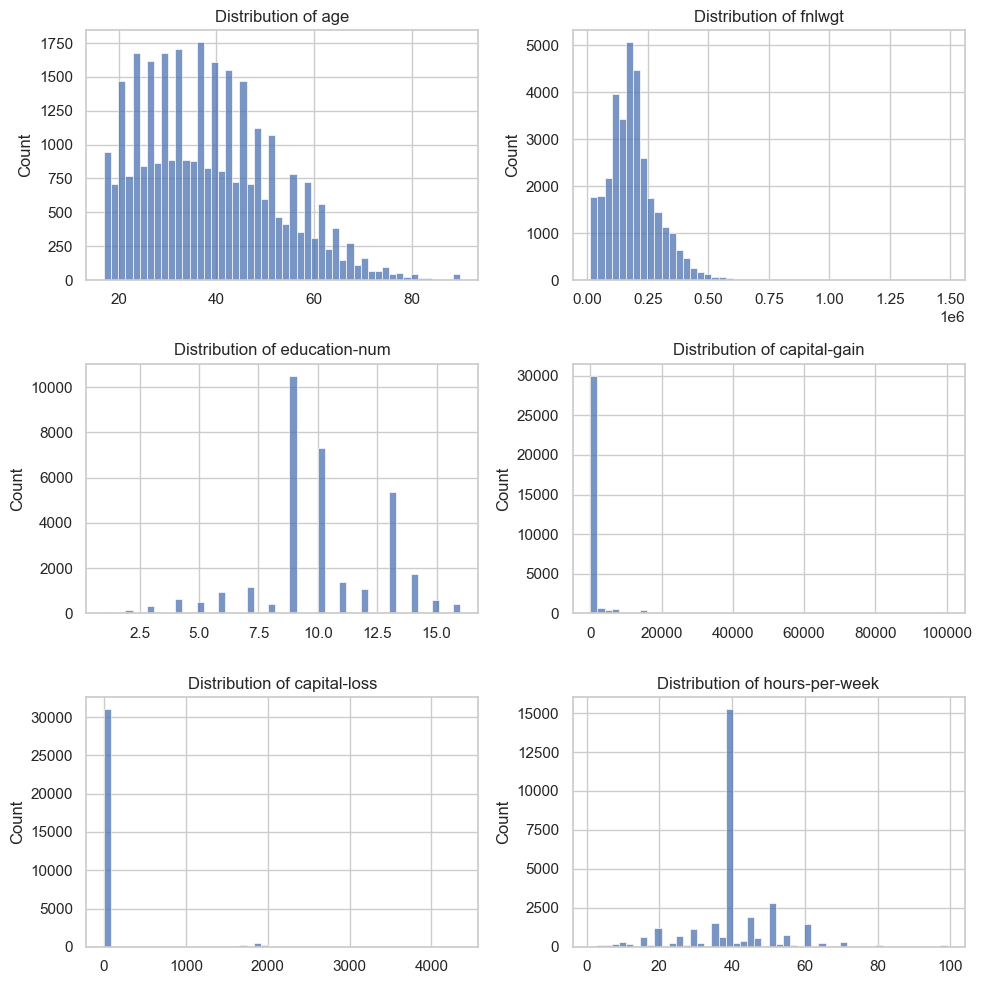

In [304]:
# Numeric Distribution
plt.figure(figsize=(10, 10))
sns.set(style="whitegrid")


for index,col in enumerate(numeric_cols):
    plt.subplot(3,2,index+1)
    sns.histplot(data=df, x=col, bins=50)
    plt.title(f"Distribution of {col}")
    plt.xlabel("")

plt.tight_layout()
plt.show()


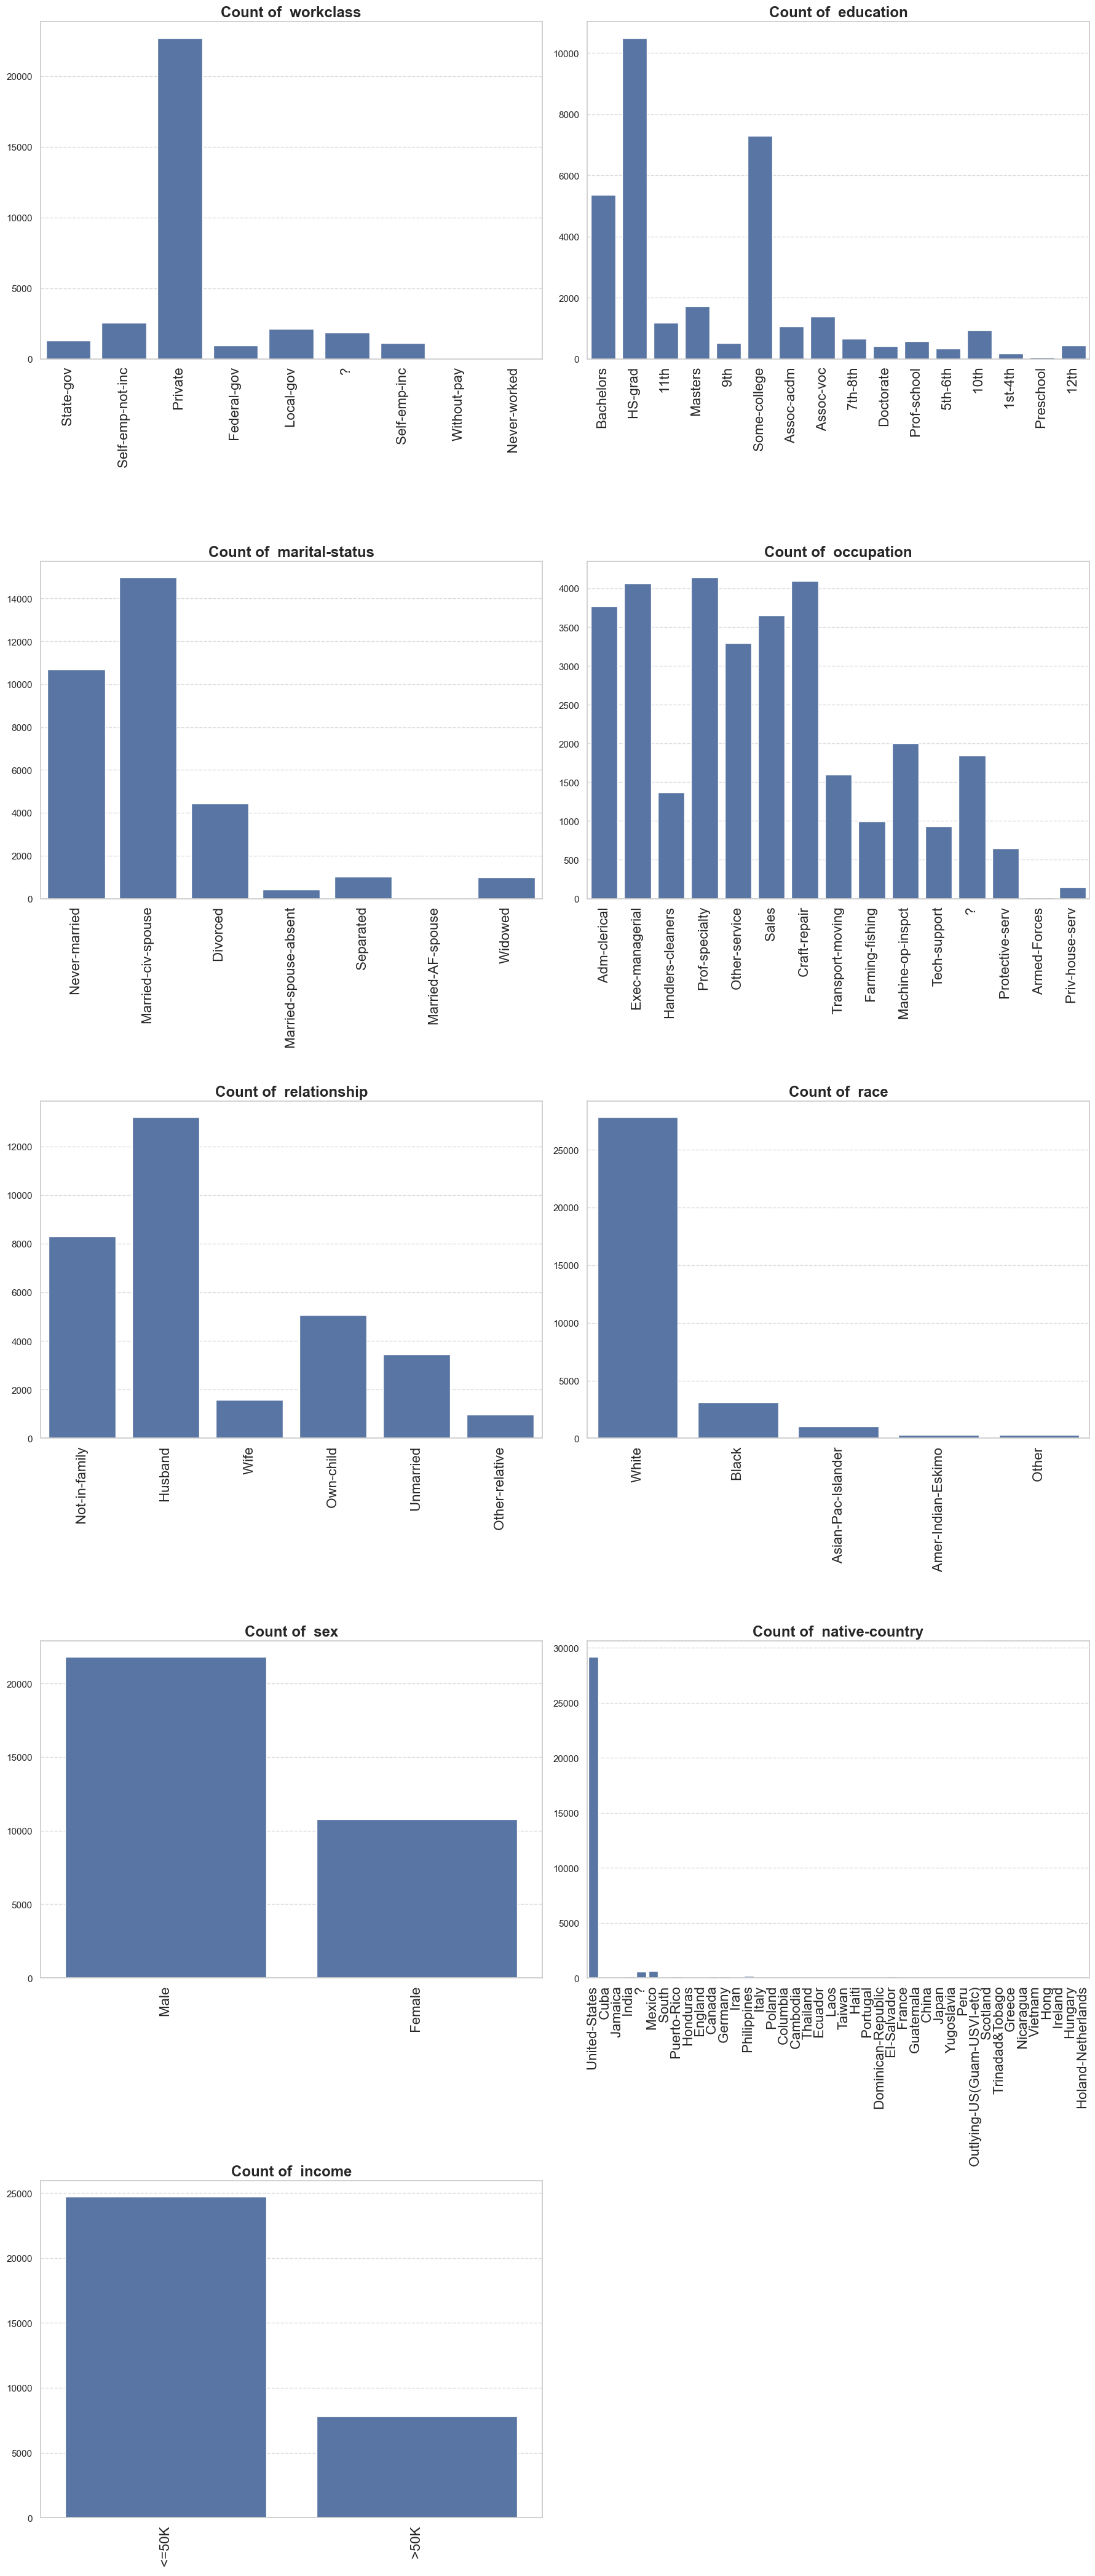

In [92]:
# Categorical Distribution
sns.set(style="whitegrid")

plt.figure(figsize=(18, 50))
for index,col in enumerate(categorical_cols):
    plt.subplot(6,2,index+1)
    sns.countplot(data=df, x=col)
    plt.title(f"Count of {col}",fontweight="bold",fontsize="x-large")
    plt.xticks(rotation=90,fontsize=16)
    plt.xlabel("")
    plt.ylabel("")
    
    
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.subplots_adjust(hspace=1)
plt.tight_layout()
plt.show()

# INSIGHTS EXTRACTED FROM DATA

In [221]:
# Initialize the sql view
ctx = pl.SQLContext(frames={"df":df},eager=True)

<Axes: xlabel='income', ylabel='education'>

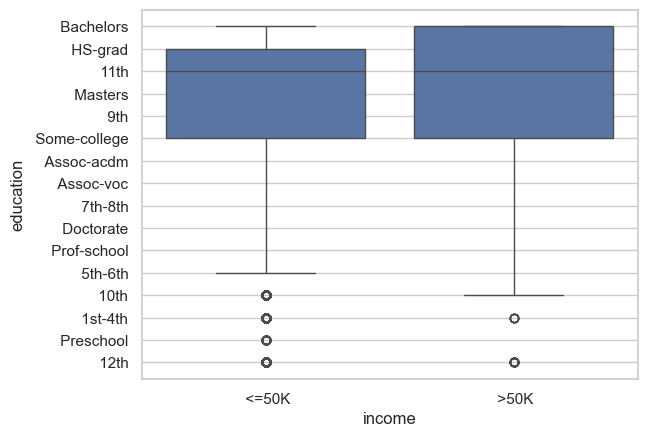

In [223]:
# QUESTION: Education vs Income
sns.boxplot(df,x="income",y="education")

## Insights
1. **Individuals with higher education tend to have higher-paying jobs.**  
2. **However, there are clear outliers with lower education levels who defy this pattern.**


<Axes: xlabel='income', ylabel='count'>

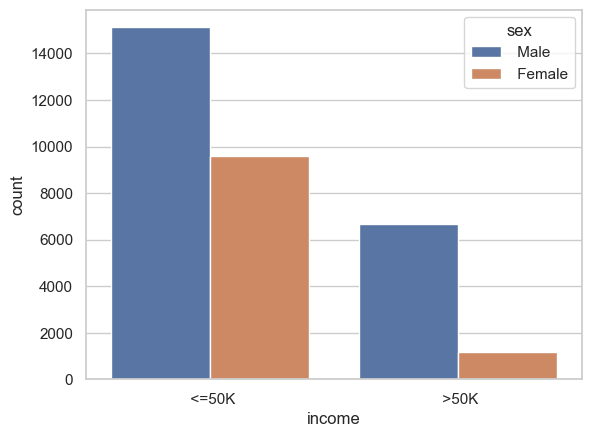

In [232]:
# Question: Gender pay gap
sns.countplot(df,x="income",hue="sex")

# Insights
**The male in the two cases earns more**

Text(0.5, 1.0, 'work hours per week by gender')

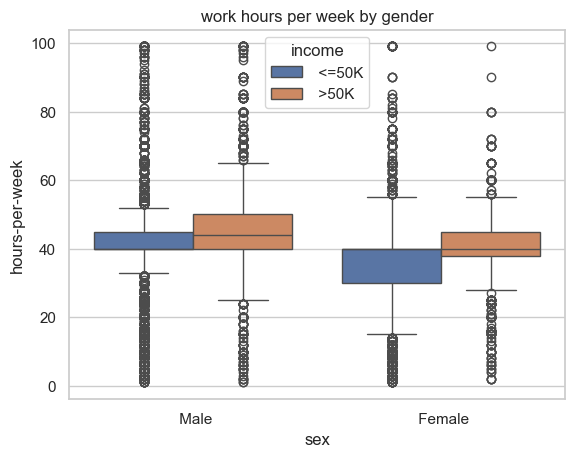

In [233]:
# Question investigate the relationship between work hours and income with respect to the genders
sns.boxplot(data=df, x='sex', y='hours-per-week', hue='income')
plt.title("work hours per week by gender")


# INSIGHTS
1. for male earning <50k the average hours-per-week are 40 
2. for male earning >50k the average hours-per-week are 45
3. there are outliers indicating men working extremely high hours >80 on low income and high income

1. for women earning <50k the average hours-per-week are 40 
2. for women earning >50k the average hours-per-week are 40 and many outliers 
3. Fewer outliers compared to men suggesting less variability in hours worked among females

# Conclusion
1. the range of hours worked for men seems a lot larger than that of females    
2. for >50k both the genders work more hours on avg but males seem to dominate the outlier range




<Axes: xlabel='income', ylabel='count'>

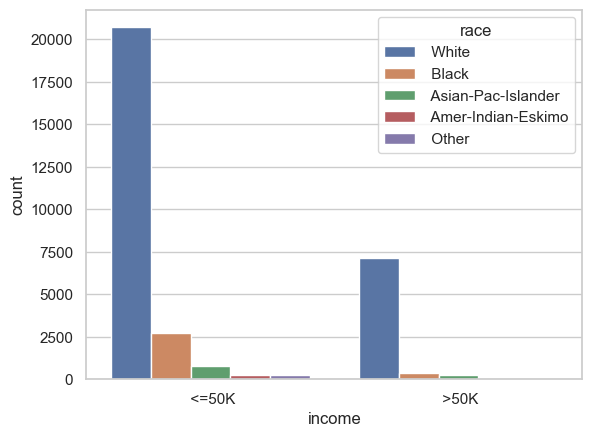

In [236]:
# Question: is there any relationship between the race and income

sns.countplot(df,hue="race",x="income")

In [327]:
# Feature Engineering
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    df=df.with_columns(
        (pl.col(col).map_batches(lambda x:LabelEncoder().fit_transform(x))),
    )
    
for col in numeric_cols:
    df=df.with_columns(
        (pl.col(col)-pl.col(col).mean())/pl.col(col).std().alias(col)
    )

In [346]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.feature_selection import SelectFromModel,SelectKBest,RFE,RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
x=df.drop("income")
y=df['income']

In [360]:
clf = ExtraTreesClassifier(n_estimators=100)
model = SelectFromModel(clf, prefit=False,max_features=10).fit(x,y)
X_new = model.transform(x)

print(f"Features Reduced from 14 to {len(model.get_feature_names_out())}")
print(f"Features remaining : {list(model.get_feature_names_out())}")

Features Reduced from 14 to 8
Features remaining : ['age', 'fnlwgt', 'education-num', 'marital-status', 'occupation', 'relationship', 'capital-gain', 'hours-per-week']


In [366]:
# Train an instance of RandomForest on the raw data 
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train,y_train)

predictions=rfc.predict(x_test)
accuracy=accuracy_score(y_test,predictions)
print(f"Accuracy Score: {accuracy}")
print(f"Classification report:\n {classification_report(y_test,predictions)}")

Accuracy Score: 0.8575157377552587
Classifcation report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.74      0.63      0.68      1568

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



In [367]:
# Train an instance of RandomForest on the data after feature selection with ExtraTreeClassifier
x_train,x_test,y_train,y_test= train_test_split(X_new,y,test_size=0.2,stratify=y,random_state=42)

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train,y_train)

predictions=rfc.predict(x_test)
accuracy=accuracy_score(y_test,predictions)
print(f"Accuracy Score: {accuracy}")
print(f"Classification report:\n {classification_report(y_test,predictions)}")

Accuracy Score: 0.8461538461538461
Classifcation report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      4945
           1       0.72      0.60      0.65      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [391]:
# Train an instance of RandomForest on the data after feature selection RFE  with ExtraTreeClassifier
estimator = ExtraTreesClassifier(n_estimators=50)
feature_selector=RFE(estimator).fit(x,y)
features_indexes=feature_selector.get_support(indices=True)
print(f"Number of features selected : {len(features_indexes)}")
print(f"Features selected : {features_indexes}")

X_new=x[:,features_indexes]

x_train,x_test,y_train,y_test= train_test_split(X_new,y,test_size=0.2,stratify=y,random_state=42)

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train,y_train)
 
predictions=rfc.predict(x_test)
accuracy=accuracy_score(y_test,predictions)
print(f"Accuracy Score: {accuracy}")
print(f"Classification report:\n {classification_report(y_test,predictions)}")

Number of features selected : 7
Features selected : [ 0  2  4  5  7 10 12]
Accuracy Score: 0.8277291570704745
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89      4945
           1       0.66      0.58      0.62      1568

    accuracy                           0.83      6513
   macro avg       0.77      0.74      0.75      6513
weighted avg       0.82      0.83      0.82      6513



In [380]:
# Train an instance of RandomForest on the data after feature selection RFECV  with ExtraTreeClassifier
estimator = ExtraTreesClassifier(n_estimators=50)
feature_selector=RFECV(estimator,cv=10,min_features_to_select=10).fit(x,y)
features_indexes=feature_selector.get_support(indices=False)
print(f"Number of features selected : {len(features_indexes)}")
print(f"Features selected : {features_indexes}")

X_new=x[:,features_indexes]

x_train,x_test,y_train,y_test= train_test_split(X_new,y,test_size=0.2,stratify=y,random_state=42)

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train,y_train)

predictions=rfc.predict(x_test)
accuracy=accuracy_score(y_test,predictions)
print(f"Accuracy Score: {accuracy}")
print(f"Classification report:\n {classification_report(y_test,predictions)}")

Number of features selected : 14
Features selected : [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Accuracy Score: 0.8619683709504069
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      4945
           1       0.75      0.64      0.69      1568

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513




# HyperParameter Tuning 


In [392]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import numpy as np
rfc=RandomForestClassifier()
x_train,x_test,y_train,y_test= train_test_split(X_new,y,test_size=0.2,stratify=y,random_state=42)


parameters = {
    "n_estimators": np.arange(40, 200, 40),  # Number of trees in the forest
    "max_features": ["sqrt", "log2", None],  # Number of features to consider for splits
    "max_depth": [None, 10, 20, 30, 40, 50],  # Maximum depth of the trees
    "min_samples_split": [2, 5, 10],  # Minimum samples required to split an internal node
    "min_samples_leaf": [1, 2, 4,8,12],  # Minimum samples required to be at a leaf node
    "bootstrap": [True, False],  # Whether to use bootstrap samples
    "criterion": ["gini", "entropy"],  # Splitting criterion
}

grid_search = RandomizedSearchCV(
    estimator=rfc,
    param_distributions=parameters,
    cv=5,
    scoring="accuracy"    
)
grid_search.fit(x_train,y_train)

print("Best Parameters:", grid_search.best_params_)

rfc=grid_search.best_estimator_
predictions=rfc.predict(x_test)
accuracy=accuracy_score(predictions,y_test)
print(f"Accuracy Score {accuracy}")
print(f"Classification report:\n {classification_report(y_test,predictions)}")


Best Parameters: {'n_estimators': 160, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 40, 'criterion': 'entropy', 'bootstrap': True}
Accuracy Score 0.8492246276677414
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      4945
           1       0.73      0.59      0.65      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513



In [400]:
import sklearn
import graphviz

sklearn.tree.export_graphviz(
    rfc.estimators_[0],
    out_file="tree.dot",
    feature_names=X_new.columns,
    class_names=["<=50k", ">=50k"],
    filled=True,
    rounded=True,
)

In [401]:
!dot -Tpng tree.dot -o tree.png

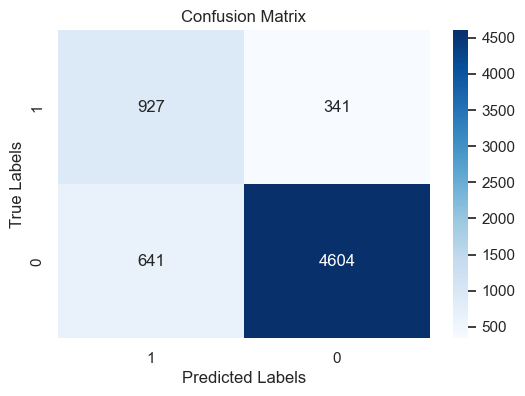

In [406]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

conf_matrix = confusion_matrix(predictions,y_test , labels=[1, 0])

# Plot confusion matrix using seaborn for better visuals
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["1", "0"], yticklabels=["1", "0"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

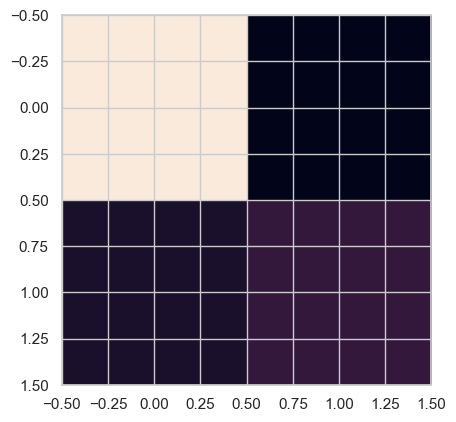

In [404]:
plt.imshow(cm, interpolation='nearest')